In [ ]:
###############################################################
# REP Analysis for the Flat Scan Sampling single core
# João Inácio, Mar. 31st, 2021
# 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
# System and simulation information


dim = "2D"
lattice = "SS"
NN = 4

L = 4
N_atm = 1 * L ** 2

max_E = (1 / 2) * NN * N_atm
max_M = N_atm
NE = int(1 + (max_E / 2))
NM = N_atm + 1
energies = np.linspace(- max_E, max_E, NE)
magnetizations = np.linspace(- max_M, max_M, NM)

REP_vals = 10 ** np.array([3, 4, 5, 6])
skip = N_atm

q_max = (NM + 1) // 2 - 2
if NM % 2 == 0:
    q_max = NM // 2 - 3


In [8]:
# Get the data

n_run = 1000

JDOS_all = list()
for i in range(len(REP_vals)):
    JDOS_all.append(list())

wall_time_all = np.zeros((n_run, len(REP_vals)))
q_time_E_all = np.zeros((n_run, len(REP_vals)))

cfg_chkbrd = np.zeros((n_run, len(REP_vals)))
cfg_slice = np.zeros((n_run, len(REP_vals)))
cfg_zerozero = np.zeros((n_run, len(REP_vals)))

JDOS_mean = list()
wall_time_mean = list()
q_time_E_mean = list()

k = 0
for REP in REP_vals:
    for run in range(1, n_run + 1):
        file_name = "".join(("./data/", lattice, "/L", str(L), "/", 
                             str(int(np.log10(REP))), "/", str(run), "_JDOS_FSS_Ising_", 
                             dim, "_", lattice, "_L", str(L), "_REP_1E",
                             str(int(np.log10(REP))), "_skip_", str(skip)))
        JDOS = np.loadtxt(file_name + ".txt")
        JDOS[:, q_max+2:NM] = JDOS[:, range(q_max, -1, -1)]

        cfg_chkbrd[run - 1, k] = JDOS[len(energies) - 1, q_max+1]
        cfg_slice[run - 1, k] = JDOS[L, q_max+1]
        cfg_zerozero[run - 1, k] = JDOS[np.where(energies == 0)[0][0], q_max+1]

        JDOS_all[k].append(JDOS)

        with open(file_name + "_data.txt", 'r') as data_file:
            header = data_file.readline().strip("\n")

            q_time_E = np.zeros(q_max)
            for i in range(0, q_max):
                line = data_file.readline().strip("\n").split(" ")
                q_time_E[i] = float(line[4])

            wall_time_all[run - 1, k] = float(data_file.readline().strip("\n"))
            q_time_E_all[run - 1, k] = np.sum(q_time_E)
    
    JDOS_mean.append(sum(JDOS_all[k]) / n_run)
    wall_time_mean.append(sum(wall_time_all[:, k]) / n_run)
    q_time_E_mean.append(np.average(q_time_E_all[:, k]))
    
    print(REP)
    print("Mean Wall time: {:.5f} seconds".format(wall_time_mean[k]))
    print("Mean q_time / E: {:.5f} seconds".format(q_time_E_mean[k]))
    print()
    
    k += 1


1000
Mean Wall time: 0.04204 seconds
Mean q_time / E: 0.01018 seconds

10000
Mean Wall time: 0.34450 seconds
Mean q_time / E: 0.07429 seconds

100000
Mean Wall time: 3.37816 seconds
Mean q_time / E: 0.67748 seconds

1000000
Mean Wall time: 33.30707 seconds
Mean q_time / E: 6.63067 seconds



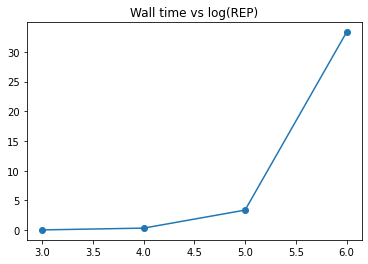

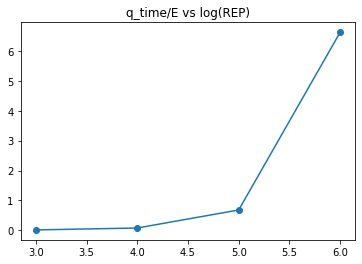

In [9]:
# Plot Wall time and q_time/E

# Wall time
plt.figure(1)
plt.plot(np.log10(REP_vals), wall_time_mean, '-o')
plt.title("Wall time vs log(REP)")
    
# q_time/E
plt.figure(2)
plt.plot(np.log10(REP_vals), q_time_E_mean, '-o')
plt.title("q_time/E vs log(REP)")

plt.show()

    

In [5]:
# Fit normal distributions to configurations

fit_chkbrd = np.zeros((len(REP_vals), 2))
fit_slice = np.zeros((len(REP_vals), 2))
fit_zerozero = np.zeros((len(REP_vals), 2))

for k in range(len(REP_vals)):
    print(REP_vals[k])
    
    # Checkerboard
    fit_chkbrd[k] = norm.fit(cfg_chkbrd[:, k])
    print("mean: {:.5f}; var: {:.5f}".format(fit_chkbrd[k, 0], fit_chkbrd[k, 1]))

    # Slice
    fit_slice[k] = norm.fit(cfg_slice[:, k])
    print("mean: {:.5f}; var: {:.5f}".format(fit_slice[k, 0], fit_slice[k, 1]))

    # Zerozero
    fit_zerozero[k] = norm.fit(cfg_zerozero[:, k])
    print("mean: {:.5f}; var: {:.5f}".format(fit_zerozero[k, 0], fit_zerozero[k, 1]))
    
    print()



1000
mean: 2.00275; var: 0.05217
mean: 7.99987; var: 0.31542
mean: 4356.27411; var: 24.59879

10000
mean: 2.00005; var: 0.01627
mean: 7.99990; var: 0.10013
mean: 4356.07017; var: 8.26744

100000
mean: 2.00021; var: 0.00495
mean: 8.00105; var: 0.03233
mean: 4356.03491; var: 2.47487

1000000
mean: 2.00000; var: 0.00161
mean: 7.99984; var: 0.01010
mean: 4355.99893; var: 0.79780



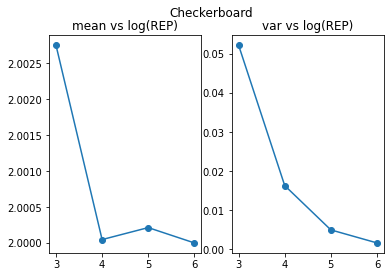

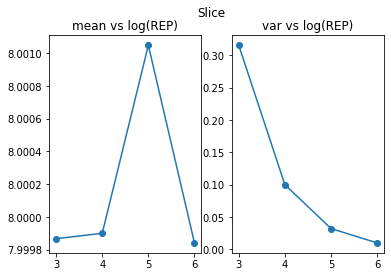

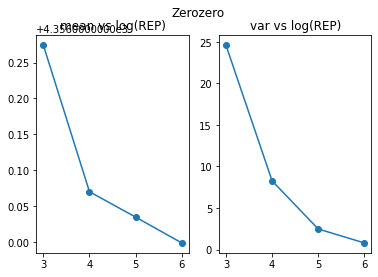

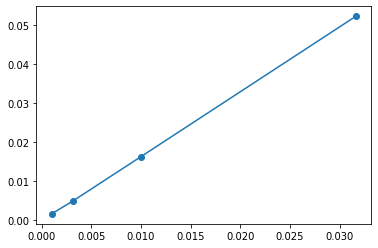

In [12]:
# Plot mean and var for the fitted distribuitions
# var(1/sqrt(REP))

# Checkerboard
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.suptitle("Checkerboard")

ax1.plot(np.log10(REP_vals), fit_chkbrd[:, 0], '-o')
ax1.set_title("mean vs log(REP)")

ax2.plot(np.log10(REP_vals), fit_chkbrd[:, 1], '-o')
ax2.set_title("var vs log(REP)")


# Slice
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.suptitle("Slice")

ax1.plot(np.log10(REP_vals), fit_slice[:, 0], '-o')
ax1.set_title("mean vs log(REP)")

ax2.plot(np.log10(REP_vals), fit_slice[:, 1], '-o')
ax2.set_title("var vs log(REP)")
    
# Zerozero
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.suptitle("Zerozero")

ax1.plot(np.log10(REP_vals), fit_zerozero[:, 0], '-o')
ax1.set_title("mean vs log(REP)")

ax2.plot(np.log10(REP_vals), fit_zerozero[:, 1], '-o')
ax2.set_title("var vs log(REP)")

plt.figure(4)

plt.plot(1/np.sqrt(REP_vals), fit_chkbrd[:, 1], '-o')

plt.show()
# Barras de erro -> sigma para cada lado


In [ ]:
# If L = 4, compute error
# Varios REP

if L == 4:
    JDOS_exact = np.loadtxt('JDOS_exact_L4_SS.txt')
    
    error_all = list()
    
    for run in range(0, n_run):
        JDOS_error = JDOS_all[run] - JDOS_exact
        JDOS_error = JDOS_error[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]] / JDOS_exact[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]]
        error_all.append(np.sum(np.sum(JDOS_error)))
        
        JDOS_error_abs = np.abs(JDOS_all[run] - JDOS_exact)
        JDOS_error_abs = JDOS_error_abs[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]] / JDOS_exact[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]]
        error_all_abs.append(np.sum(np.sum(JDOS_error_abs)))
    
    _, bins, _ = plt.hist(error_all, 25, density=True, alpha=1, edgecolor='black', linewidth=1.2)

    fit_error = norm.fit(error_all)
    best_fit_line = norm.pdf(bins, fit_error[0], fit_error[1])
    print("mean: {:.5f}; var: {:.5f}".format(fit_error[0], fit_error[1]))

    plt.plot(bins, best_fit_line)
    plt.title("Error distribution " + dim + "_" + 
              lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))
    plt.show()
    